In [1]:
# Needed imports for the program
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestRegressor # For using Random Forests

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [3]:
# Reading in the original dataset
data_initial = pd.read_csv('18k_Projects.csv', low_memory=False)

In [4]:
# Printing out the initial columns
data_initial.columns

Index(['Id', 'Name', 'Url', 'State', 'Currency', 'Top Category', 'Category',
       'Creator', 'Location', 'Updates', 'Comments', 'Rewards', 'Goal',
       'Pledged', 'Backers', 'Start', 'End', 'Duration in Days',
       'Facebook Connected', 'Facebook Friends', 'Facebook Shares',
       'Has Video', 'Latitude', 'Longitude', 'Start Timestamp (UTC)',
       'End Timestamp (UTC)', 'Creator Bio', 'Creator Website',
       'Creator - # Projects Created', 'Creator - # Projects Backed',
       '# Videos', '# Images', '# Words (Description)',
       '# Words (Risks and Challenges)', '# FAQs'],
      dtype='object')

In [5]:
# Printing out the initial data
data_initial

,Id,Name,Url,State,...,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,1007121454,Nail Art and Photos Printed on your Nails w/ E...,https://www.kickstarter.com/projects/137019948...,failed,...,2,297,153.0,0
1,2032015036,Cold Again,https://www.kickstarter.com/projects/737783165...,failed,...,0,276,98.0,0
2,733782855,Uchu Bijin Jewelry,https://www.kickstarter.com/projects/uchubijin...,failed,...,12,1049,66.0,2
...,...,...,...,...,...,...,...,...,...
18139,1856281681,The Awkward Yeti's Great Big Project - 3 Books...,https://www.kickstarter.com/projects/106395834...,successful,...,6,962,238.0,1
18140,1845568888,King James Version,https://www.kickstarter.com/projects/193669267...,failed,...,1,654,131.0,0
18141,1693087893,BBC Gardeners' World Live - RHS Show Garden co...,https://www.kickstarter.com/projects/jasonloh/...,failed,...,6,372,156.0,0


In [6]:
# Removing all of the extra columns
data_initial.drop(labels=['Id', 'Name', 'Url', 'Category', 'Creator', 'Location'], axis=1, inplace=True)
data_initial.drop(labels=['Updates', 'Start', 'End',  '# FAQs', 'Start Timestamp (UTC)'], axis=1, inplace=True)
data_initial.drop(labels=['End Timestamp (UTC)', 'Latitude', 'Longitude'], axis=1, inplace=True)
data_initial.drop(labels=['Comments', 'Rewards', 'Pledged', 'Backers' ], axis=1, inplace=True)
data_initial.drop(labels=['Creator Bio', 'Creator Website', 'Creator - # Projects Backed'], axis=1, inplace=True)
data_initial.drop(labels=['# Videos', 'Facebook Connected', 'Facebook Shares', 'Has Video'],  axis=1, inplace=True)
data_initial.drop(labels=['# Words (Risks and Challenges)', 'Top Category'], axis=1, inplace=True)

In [7]:
# Printing out the remaining columns
data_initial.columns

Index(['State', 'Currency', 'Goal', 'Duration in Days', 'Facebook Friends',
       'Creator - # Projects Created', '# Images', '# Words (Description)'],
      dtype='object')

In [8]:
# Replacing successful and failed with 1 and 0, respectively
data_initial.loc[data_initial['State'] == 'successful', 'State'] = 1 
data_initial.loc[data_initial['State'] == 'failed', 'State'] = 0

In [9]:
# Making sure they all have the same currency in USD and then removing column
data_initial = data_initial[data_initial['Currency'] == 'USD']

In [10]:
# Removing all of the null data
data = data_initial.dropna()

In [11]:
# Renaming the columns
data.columns = ['State', 'Currency', 'Goal', 'Duration', 'Friends', 'Projects', 'Images', 'Words']

In [12]:
# Printing out the final data
data

,State,Currency,Goal,Duration,Friends,Projects,Images,Words
0,0,USD,20000,30,272.0,1,2,297
1,0,USD,3000,33,573.0,1,0,276
3,0,USD,5000,60,1285.0,1,0,309
...,...,...,...,...,...,...,...,...
18138,1,USD,7000,30,2346.0,2,0,123
18139,1,USD,18000,30,316.0,4,6,962
18140,0,USD,100000,30,1103.0,2,1,654


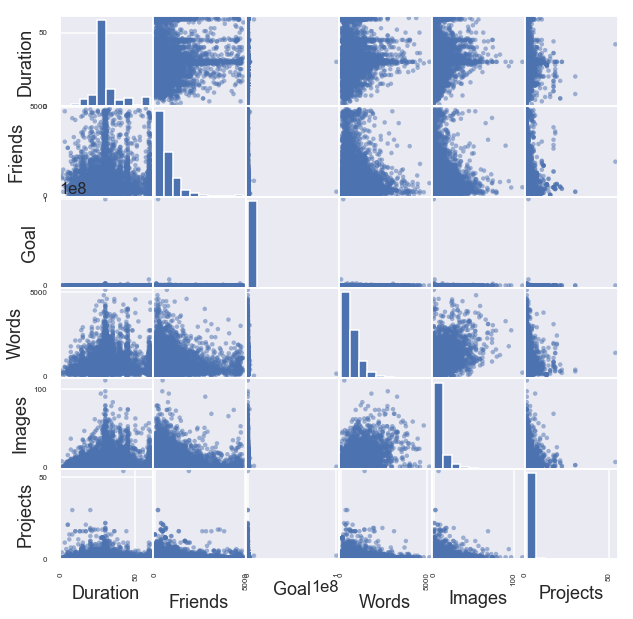

In [13]:
# Plotting out the correlation matrix of the variables we are comparing
f1 = pd.plotting.scatter_matrix(data[['Duration', 'Friends', 'Goal' ,'Words', 'Images', 'Projects']], figsize=[10,10])

Text(0.5,1,'Number of projects that failed and succeeded')

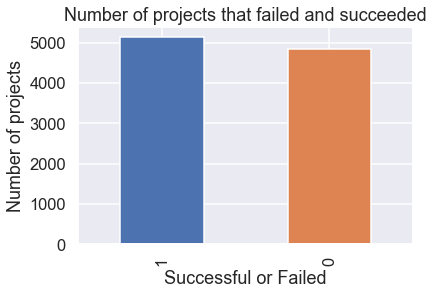

In [14]:
# Plotting total number of successes and failures in dataset
f2 = data['State'].value_counts().plot('bar')
plt.xlabel("Successful or Failed")
plt.ylabel("Number of projects")
plt.title("Number of projects that failed and succeeded")

Text(0.5,1,'Correlation of Words and Images')

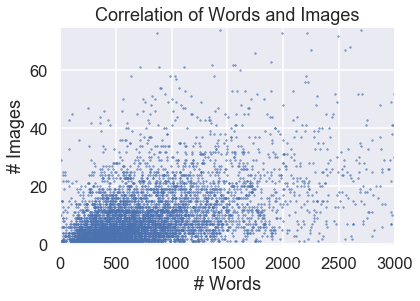

In [15]:
# Expanding plot that looked most correlated, Words and Images
plt.scatter(data['Words'], data['Images'], s=.4)
plt.xlabel('# Words')
plt.ylabel('# Images')
plt.xlim(0, 3000)
plt.ylim(0,75)
plt.title('Correlation of Words and Images')

When examined more closely, the correlation does appear to be low between words and images, meaning both will most likely be needed to capture the data, instead of being able to leave one or the other out with minimal effects.

Text(0.5,1,'Correlation of Goal and Words')

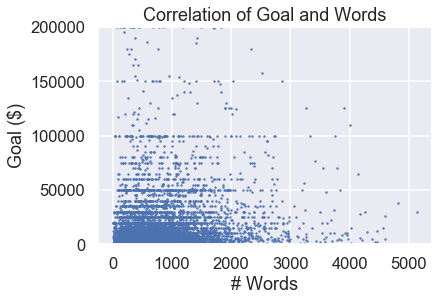

In [16]:
# Looking at one of the goal plots which appear the strangest
plt.scatter(data['Words'], data['Goal'], s=.8)
plt.xlabel('# Words')
plt.ylabel('Goal ($)')
plt.ylim(0, 200000)
plt.title('Correlation of Goal and Words')

The goal plot also appears to look strange with all the values appearing to be stuck at 0 for all the plots, but this is actually due to the fact that there were a few very high asking amounts for the goal so autofitting the plot to include all points makes the scaling look weird, but when a more appropiate scaling that captures most of the data is used, the plot becomes more similar to the others.

Text(0,0.5,'Whether Succeeded')

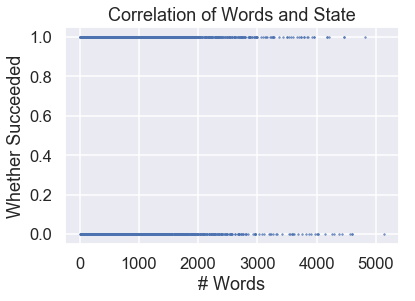

In [17]:
# Plotting State vs Words
plt.scatter(data['Words'], data['State'], s=.5)
plt.title('Correlation of Words and State')
plt.xlabel('# Words')
plt.ylabel('Whether Succeeded')

As can be seen, there is not a strong correlation between Words and State, meaning there is not a simple way to predict State using just the number of words. This means we need a more complex model to take into account the different attributes we have in order to predict whether or not a startup will be funded. 

In [18]:
# Getting array of each of attributes of data
State_Data = data['State'].values
Goal_Data = data['Goal'].values
Duration_Data = data['Duration'].values
Friends_Data = data['Friends'].values
Projects_Data = data['Projects'].values
Images_Data = data['Images'].values
Words_Data = data['Words'].values

# Creating dictionary to hold accuracy values
accuracy_rf = {}

# Working with all attributes

In [19]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]


#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['All'] = Accuracy*100

# Leaving out Goal

In [20]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Friends_Data[0:int(len(Friends_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Friends_Data[int(len(Friends_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]


#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Goal'] = Accuracy*100

# Leaving out duration

In [21]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Duration'] = Accuracy*100

# Leaving out friends

In [22]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Friends'] = Accuracy*100

# Leaving out projects

In [23]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Projects'] = Accuracy*100

# Leaving out images

In [24]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Images'] = Accuracy*100

# Leaving out words

In [25]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Words'] = Accuracy*100
              

In [26]:
# Printing out the accuracies for rf
accuracy_rf

{'All': 65.93186372745491,
 'W/O Goal': 59.83967935871743,
 'W/O Duration': 66.73346693386773,
 'W/O Friends': 61.64328657314629,
 'W/O Projects': 65.25050100200401,
 'W/O Images': 65.29058116232464,
 'W/O Words': 63.366733466933866}

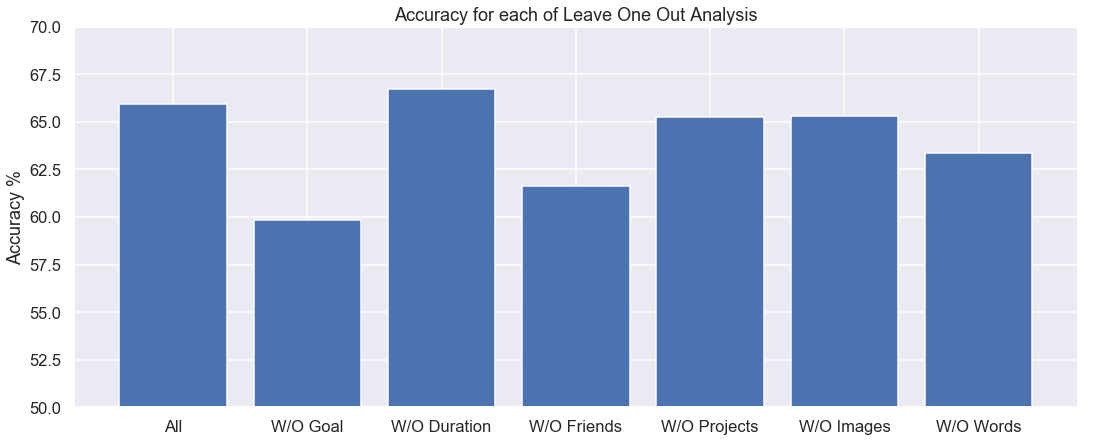

In [27]:
# Plotting out the accuracies
f, ax = plt.subplots(figsize=(18,7))
plt.bar(*zip(*accuracy_rf.items()))
plt.ylabel('Accuracy %')
plt.title('Accuracy for each of Leave One Out Analysis')
plt.ylim(50,70)
plt.show()

# Most important attribute: Goal
Looking at the results we can see that Goal is the most important factor of the attributes we examined for  determining whether or not a kickstarter will be funded since the accuracy went down the furthest when this attribute was removed from training.

# Least important attribute: Duration
Looking at the results we can see that Duration is the least important factor of the attributes we examined for determining whether or not a kickstarter will be funded since the accuracy actually improved when this attribute was removed from training. This means that duration did not help improve the training and even caused problems that slightly threw off the training, leading to worse predictions.